In [2]:
# Usar metodo de regressão polinomial quando tendencia dos dados não é definida por uma reta e sim por uma curva
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # modulo para predict
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures # modulo para polinomios com + de 1 dim
from sklearn.preprocessing import StandardScaler # modulo para normalizar 
from sklearn.pipeline import Pipeline # criar Pipeline


In [3]:
url=filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
data=pd.read_csv(url)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
df=pd.DataFrame(data)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
x=df["highway-mpg"]
y=df["price"]

In [6]:
# cria polinomio de 3º grau
# polyfit retorna o menor ajuste quadrado ( o melhor ajuste para o conjunto de dados de forma a minimizar o residuo )

f=np.polyfit(x,y,3)
print(f) 
p=np.poly1d(f)
print(p)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [7]:
# Regressão polinomial com mais de uma dimensão ( variáveis independentes)

pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(df[["horsepower","curb-weight"]])
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]], shape=(201, 5))

In [8]:
pr=PolynomialFeatures(degree=2)
pr.fit_transform([[1,2]])

array([[1., 1., 2., 1., 2., 4.]])

In [9]:
# Normalizar cada caracteristica simultaneamente (quando existem várias dimensões/var. indep.)

Scale=StandardScaler()
Scale.fit(df[["horsepower","highway-mpg"]])
x_scale=Scale.transform(df[["horsepower","highway-mpg"]])

In [10]:
x_scale

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

In [11]:
# Pipeline (conjunto de steps para predict)


In [12]:
# Cria uma cadeia de steps executada sequêncialmente, usa metodo fit ou transform de cada modulo ex.( polynomial=PolynomialFeatures(degree=2); polynomial.fit_transform(dados) )

Input=[('polynomial',PolynomialFeatures(degree=2)),('scale',StandardScaler()),('Model',LinearRegression())]

In [13]:
pipe=Pipeline(Input)

In [14]:
pipe.fit(df[["horsepower","curb-weight","engine-size","highway-mpg"]],df["price"])

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('Model', LinearRegression())])

In [15]:
yhat=pipe.predict(df[["horsepower","curb-weight","engine-size","highway-mpg"]])

In [16]:
yhat

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): # passa parametros
    x_new = np.linspace(15, 55, 100) # cria array de com 100 valores igualmente espaçados entre 15 e 55.

    y_new = model(x_new) # cria 100 valores a partir do polinomio trocando o x pelos valores de cima

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-') # 1ºs 3 parametros marcam valores observados com pontos, parametros seguintes traçam o polinomio que é o modelo ajustado
    
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [18]:
x = df['highway-mpg']
y = df['price']

In [19]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


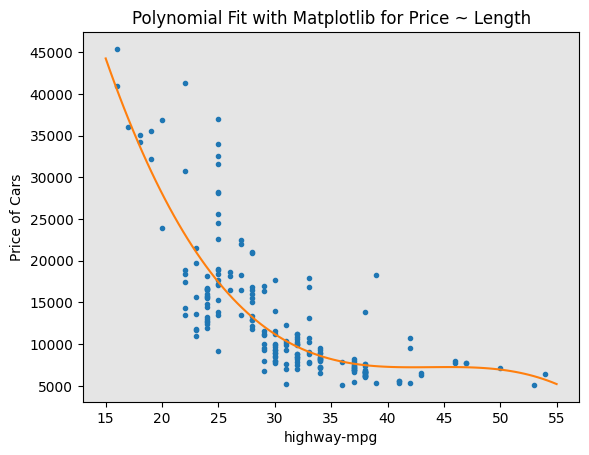

In [20]:
PlotPolly(p, x, y, 'highway-mpg')

In [21]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])